In [6]:
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import matplotlib.figure as fig
import pandas as pd

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [8]:
db_client = pymongo.MongoClient('localhost', 27017)

db_ice = db_client.ice
db_ice_posts = db_ice.posts
db_ice_comments = db_ice.comments
db_ice_users = db_ice.users

In [9]:
u = db_ice_users.find_one()

In [10]:
u

{'_id': 't2_8j1va',
 'posts_id': ['t3_bb6wx8'],
 'num_posts': 1,
 'comments_id': [],
 'num_comments': 0}

In [13]:
u["posts_id"]

['t3_bb6wx8']

In [5]:
for p in db_ice_posts.find({}).limit(100):
    print(p["selftext"])
    print("\n")

So, I finally brought myself to post here.
For the past year, I've had some of the lowest moment in my life, I'm constantly feeling like I have no friends, and that the few I have don't care about me and need me only when I can be of use to them. I keep feeling like I'm wasting my life..
I'm at the point where apparantly, I have to decide what I want to do for the rest of my life, but I don't know what I want, I have no hobbies, no passions, I never commited to anything. It goes on, but the worst for me, is that I just can't talk about it to anyone, for long I wanted to post here, but I never do because I always see people having it much worse than me, and I end up saying myself that I really don't have anything to be sad or "depressed" about, so I don't do anything about it because I don't want to look like an imposteur.
I hope that throwing my rant somewhere, even if noone reads it, will help..


[deleted]


Hey Redditors,

Im 21 Years old and as you can guess im struggling with depr

In [4]:
# Distrbuicao do numero de pessoas com numero de posts igual a X
distribuicao_num_posts = [0 for a in range(0,500)]
for a in db_ice_users.find():
    distribuicao_num_posts[a["num_posts"]]+=1
for a in range(0,500):
    print(a," ",distribuicao_num_posts[a])

0   189848
1   172105
2   26552
3   10169
4   5036
5   2961
6   1934
7   1318
8   973
9   755
10   572
11   437
12   375
13   285
14   250
15   183
16   171
17   147
18   127
19   96
20   106
21   75
22   52
23   67
24   57
25   47
26   42
27   41
28   43
29   35
30   35
31   36
32   31
33   15
34   23
35   17
36   13
37   13
38   13
39   9
40   15
41   13
42   16
43   11
44   11
45   11
46   12
47   11
48   11
49   4
50   1
51   8
52   5
53   6
54   4
55   3
56   2
57   5
58   9
59   9
60   4
61   2
62   6
63   5
64   2
65   4
66   5
67   1
68   5
69   5
70   2
71   0
72   3
73   5
74   2
75   3
76   1
77   2
78   2
79   4
80   2
81   2
82   3
83   3
84   1
85   0
86   4
87   0
88   1
89   0
90   2
91   1
92   1
93   0
94   1
95   0
96   1
97   0
98   1
99   1
100   1
101   0
102   0
103   3
104   4
105   1
106   1
107   0
108   0
109   3
110   0
111   1
112   0
113   2
114   0
115   0
116   0
117   1
118   1
119   1
120   1
121   0
122   1
123   0
124   0
125   0
126   0
127   0
128 

In [433]:
# Seleciona usuarios com mais de 10 posts
u = db_ice_users.find()
usuarios = []
for a in u:
    if a["num_posts"]>10:
        usuarios += [[a["_id"], a["posts_id"]]]

In [435]:
# Carrega usuarios e tempos do BD
posts = []
for posts in usuarios:
    usu = posts[0]
    r = db_ice_posts.find({"_id": {"$in": posts[1]}})
    tempos = []
    for a in r:
        tempos += [a["created_utc"]]
    posts += [tempos]

In [436]:
usuarios

[['t2_x37bhmc',
  ['t3_b7jvwr',
   't3_a9c0lv',
   't3_asq0zj',
   't3_89sg35',
   't3_8fn88x',
   't3_94oab8',
   't3_9aibv6',
   't3_9e524t',
   't3_9i3mcu',
   't3_9ld5h7',
   't3_9q5lmk',
   't3_9r4hh4',
   't3_9roa5z',
   't3_9vd8w4'],
  [1522868597.0,
   1524954240.0,
   1533433212.0,
   1535312426.0,
   1536420789.0,
   1537654981.0,
   1538668604.0,
   1540144705.0,
   1540420573.0,
   1540585362.0,
   1541706434.0,
   1545712607.0,
   1550678679.0,
   1554006317.0]],
 ['t2_2jcd8keh',
  ['t3_bfwson',
   't3_bil4sd',
   't3_a9xmjc',
   't3_ax468p',
   't3_9u23ix',
   't3_9ukpc1',
   't3_9wlwbe',
   't3_9xtqik',
   't3_9yjeok',
   't3_a052y0',
   't3_a11zg1',
   't3_a1xohx',
   't3_a274ar',
   't3_a4z7to'],
  [1541322700.0,
   1541474218.0,
   1542084057.0,
   1542430971.0,
   1542651984.0,
   1543115544.0,
   1543373141.0,
   1543620485.0,
   1543700397.0,
   1544472388.0,
   1545900984.0,
   1551682630.0,
   1555899873.0,
   1556513363.0]],
 ['t2_pvny7',
  ['t3_82wbgq',
   't3_

In [454]:
# Seleciona sequencia de posts de acordo com parametros
numero_minimo_da_sequencia = 9
numero_max_de_silencio = 60*60*24*15
posts_selecionados = []
for u in usuarios:
    nome = u[0]
    posts_id = u[1]
    dates = u[2]
    tmp = []
    for i in range(len(posts_id)-1):
        tmp += [posts_id[i]]
        if(dates[i+1]-dates[i] > numero_max_de_silencio):
            if(len(tmp)>numero_minimo_da_sequencia):
                posts_selecionados += [[nome,tmp]]
            tmp = []
    tmp += [posts_id[i+1]]
#     posts_selecionados += [[nome,tmp]]
        

In [457]:
bla = []
for posts in posts_selecionados:
    usu = posts[0]
    r = db_ice_posts.find({"_id": {"$in": posts[1]}})
    tempos = []
    for a in r:
        tempos += [a["created_utc"]]
    intervals = []
    for t in range(1, len(tempos)):
        print(t)
        print(posts[1][t])
        print((tempos[t]-tempos[t-1])/(60*60*24))
    print("\n\n")

1
t3_bil4sd
1.7536805555555555
2
t3_a9xmjc
7.058321759259259
3
t3_ax468p
4.015208333333334
4
t3_9u23ix
2.5580208333333334
5
t3_9ukpc1
5.365277777777778
6
t3_9wlwbe
32.23888888888889
7
t3_9xtqik
66.91719907407408
8
t3_9yjeok
48.81068287037037
9
t3_a052y0
7.100578703703704



1
t3_5rj2lz
0.04795138888888889
2
t3_5s7dkq
0.11020833333333334
3
t3_511wi7
0.4049421296296296
4
t3_5125r2
0.1870601851851852
5
t3_512p2l
1.8117361111111112
6
t3_514cly
1.2938194444444444
7
t3_515ksl
0.02539351851851852
8
t3_51fmph
0.7166782407407407
9
t3_51nwe1
2.4529282407407407
10
t3_51o2qr
0.10166666666666667
11
t3_51s01j
4.689259259259259
12
t3_526m1q
3.1674074074074072
13
t3_5275m9
135.07767361111112
14
t3_52ymej
0.8217129629629629
15
t3_53fdas
3.588622685185185



1
t3_aw0kwh
3.250891203703704
2
t3_858nr0
0.24763888888888888
3
t3_8c4ltm
9.218217592592593
4
t3_8gtkh1
8.941145833333334
5
t3_8lfxvy
404.92806712962965
6
t3_9ehsbb
26.981377314814814
7
t3_9m2nzi
19.765150462962964
8
t3_9npo7v
19.254166666666666
9
t

1
t3_70ecj3
1.4815162037037037
2
t3_70l4yd
1.0319675925925926
3
t3_70oulr
0.6081134259259259
4
t3_71509u
2.044259259259259
5
t3_71clxr
0.9533217592592592
6
t3_71g5kn
0.37538194444444445
7
t3_71ixp3
0.4420949074074074
8
t3_71ri2r
1.0811458333333333
9
t3_71vzcl
0.5193055555555556
10
t3_71y3pa
0.3967824074074074
11
t3_722bxv
0.5273148148148148
12
t3_72852e
0.8514814814814815
13
t3_72cpgk
0.6801851851851852
14
t3_72h8gu
0.4828125
15
t3_72tfnu
1.6079976851851852
16
t3_731410
0.986574074074074
17
t3_731od8
0.057569444444444444
18
t3_73fpx8
1.9377546296296295
19
t3_73htjc
0.24859953703703705
20
t3_73tunw
1.7672800925925927
21
t3_741ybs
1.0437731481481483
22
t3_745ymd
0.4681018518518518
23
t3_74d57r
0.9110185185185186
24
t3_74iaug
0.7009953703703704
25
t3_74rtrl
1.2224305555555555



1
t3_9dvvjp
12.1134375
2
t3_9fj6do
2.778321759259259
3
t3_606ex9
14.178425925925925
4
t3_6b71o5
2.1013888888888888
5
t3_6t6aul
0.6454976851851851
6
t3_77otpg
0.2404976851851852
7
t3_4quyiy
1.0846527777777777
8
t3_

1
t3_aoktss
0.6222222222222222
2
t3_azt2gb
6.92318287037037
3
t3_b0l5wx
8.067395833333334
4
t3_80cqqs
8.34587962962963
5
t3_80jawj
6.04412037037037
6
t3_82bdf0
7.937951388888889
7
t3_84aa50
3.9922453703703704
8
t3_86auf3
7.18662037037037
9
t3_87rlx3
10.622164351851852
10
t3_89ytd7
2.76875
11
t3_8axl48
8.729155092592592
12
t3_8coequ
13.873113425925926
13
t3_8f9kkx
262.2184375
14
t3_8fvrw0
30.67304398148148
15
t3_8hz1dw
1.9670254629629629
16
t3_8latg6
26.348240740740742



1
t3_784ftj
0.06542824074074075
2
t3_784xnt
0.5753356481481482
3
t3_788zxk
0.14166666666666666
4
t3_78aga4
0.2034375
5
t3_78cc36
0.018171296296296297
6
t3_78chox
0.7103356481481482
7
t3_78hqjy
0.0060879629629629626
8
t3_78hssz
0.14780092592592592
9
t3_78j9i6
0.08943287037037037
10
t3_78k29d
0.5723148148148148
11
t3_78nvda
0.4556365740740741
12
t3_78s6hw
0.046655092592592595
13
t3_78sk9a
0.960925925925926
14
t3_7901te
0.051041666666666666
15
t3_790fqc
2.8070601851851853
16
t3_79je97
0.09765046296296297
17
t3_79k6z8
1.12

6.805243055555556
61
t3_53n54c
1.1016087962962964
62
t3_53qdnw
12.356678240740742
63
t3_53vn6r
16.003113425925925
64
t3_585swc
19.631921296296298
65
t3_59k6qx
40.15179398148148



1
t3_9meevy
4.146689814814815
2
t3_9n87os
2.852615740740741
3
t3_9oauzq
3.9824421296296295
4
t3_9oml9q
1.108449074074074
5
t3_9ox8e7
0.9502777777777778
6
t3_9p7yja
1.0151041666666667
7
t3_9ph7hc
0.8379282407407408
8
t3_9qca2t
3.1402430555555556
9
t3_9qxxfw
1.967476851851852
10
t3_9r9m4u
1.124375
11
t3_9rizf9
0.8636689814814815



1
t3_6qvik8
6.190486111111111
2
t3_6rbl8f
2.00375
3
t3_6sphla
6.517245370370371
4
t3_6v8ydg
12.239282407407407
5
t3_6x3op2
8.818113425925926
6
t3_6zby12
10.96539351851852
7
t3_715jil
8.810416666666667
8
t3_75e2xu
20.27957175925926
9
t3_7c7nbo
32.31792824074074



1
t3_bdz5r2
5.376435185185185
2
t3_big30o
0.7434606481481482
3
t3_c0wwlk
249.77197916666665
4
t3_c3aiyx
12.606481481481481
5
t3_a7l3lc
39.961469907407405
6
t3_abd65b
1.964351851851852
7
t3_aoy8ov
61.73596064814815
8
t3_apm4n

t3_90lhot
36.051631944444445
2
t3_6d5psh
11.23613425925926
3
t3_6kcg5j
28.516458333333333
4
t3_6mkbd9
1.4204282407407407
5
t3_6sfd6a
6.862326388888889
6
t3_6sqyuz
0.8120486111111112
7
t3_6u6kfl
1.3153819444444443
8
t3_6uctdc
13.783344907407407
9
t3_6un0bg
0.008819444444444444
10
t3_6xi4sw
0.7489583333333333
11
t3_6xi7cu
1.2529398148148148
12
t3_6xnbng
0.001851851851851852
13
t3_6xwic0
2.002013888888889
14
t3_6xwiv6
0.0027083333333333334
15
t3_6ybrew
0.12429398148148148
16
t3_6ybs66
0.002384259259259259
17
t3_6ycrit
0.9240277777777778
18
t3_6ycs8e
2.0316666666666667
19
t3_6yjr8w
0.9305902777777778
20
t3_6yyzgb
4.131516203703704
21
t3_6z51gh
9.589560185185185
22
t3_6zzjql
1.2904050925925925
23
t3_71zfas
0.19114583333333332
24
t3_728t1p
1.8051041666666667
25
t3_72a7md
0.0038541666666666668
26
t3_72oh1m
277.2428009259259
27
t3_72oi7v
19.804537037037036



1
t3_791hs6
20.28065972222222
2
t3_7a9r44
6.002928240740741
3
t3_7bzlgk
8.030740740740741
4
t3_7dyhnp
8.91017361111111
5
t3_7jp7hd
24.97

1
t3_aj7k0d
0.4979166666666667
2
t3_ajcrp5
0.15483796296296296
3
t3_ajf0iz
0.1554861111111111
4
t3_ajhkoe
0.1487037037037037
5
t3_ajjnhu
0.7821296296296296
6
t3_ajsx3i
0.3143287037037037
7
t3_ajx98x
0.6581944444444444
8
t3_ak4019
1.2405671296296297
9
t3_aki4gw
72.03633101851852



1
t3_8c92f3
0.8977893518518518
2
t3_8cboam
19.33431712962963
3
t3_913kfp
1.992025462962963
4
t3_95ljkv
0.6364236111111111
5
t3_97lkfh
0.9937268518518518
6
t3_9klnuj
0.34337962962962965
7
t3_7kpfb3
0.7223148148148149
8
t3_7kwjq1
91.80315972222222
9
t3_7owi6u
0.2807986111111111
10
t3_7pdj3a
99.11783564814814
11
t3_7pinee
16.385497685185186
12
t3_7pr5j4
7.3211458333333335
13
t3_7pubxi
47.15239583333334
14
t3_7q086w
143.9893287037037



1
t3_5qw769
0.17716435185185186
2
t3_5qxpki
0.8165509259259259
3
t3_5r3jyn
0.009027777777777777
4
t3_5r3mxr
1.2058564814814814
5
t3_5rcsep
0.7856597222222222
6
t3_5ri87b
0.2260300925925926
7
t3_5rk5cb
0.8300694444444444
8
t3_5rpz3o
0.7200578703703704
9
t3_5rum0h
2.0640277777777776

1
t3_48vi9r
25.19015046296296
2
t3_4cwr60
28.586770833333333
3
t3_4du9zb
6.348935185185185
4
t3_4dxqqw
0.7069560185185185
5
t3_4kj78n
43.90505787037037
6
t3_4l3ihj
3.4786342592592594
7
t3_4lifnm
2.88849537037037
8
t3_4lryls
1.8868518518518518
9
t3_4mgfdw
4.180150462962963
10
t3_4mi4r7
0.4126851851851852
11
t3_4ngwni
6.131111111111111
12
t3_4nidxn
0.21291666666666667
13
t3_4nodm6
1.2203240740740742
14
t3_4nxb8d
1.7186921296296296
15
t3_4oadat
2.1707638888888887
16
t3_4okqqj
1.8047916666666666
17
t3_4p0xkb
3.086527777777778
18
t3_4pdzhg
2.153321759259259
19
t3_4r4ag0
10.934247685185186
20
t3_4rugy7
4.572430555555556
21
t3_4sjxva
4.432511574074074
22
t3_4t5pdl
3.7933796296296296
23
t3_4us984
10.323148148148148



1
t3_54aj2w
42.78010416666667
2
t3_56c7zl
13.047222222222222
3
t3_575cu8
5.048356481481481
4
t3_57cu8x
1.1678472222222223
5
t3_5aq6fv
19.701863425925925
6
t3_5aux6z
0.6047337962962963
7
t3_5c6kr1
7.08949074074074
8
t3_5dy3rf
10.282789351851852
9
t3_5gfm0y
14.01849537037037



1
t

1
t3_boo20i
0.5122106481481481
2
t3_bp6cn2
7.680543981481481
3
t3_bqxx26
41.32361111111111
4
t3_bwpqzu
24.4571875
5
t3_byky1n
7.014351851851852
6
t3_a6jvzq
9.358483796296296
7
t3_a7q8x8
1.258761574074074
8
t3_anormo
51.078854166666666
9
t3_arjz95
2.9760300925925924
10
t3_at1zfe
54.91857638888889
11
t3_aucgoh
22.03824074074074
12
t3_av3ab3
7.231435185185185
13
t3_ay4flh
3.835277777777778
14
t3_b092ki
10.143090277777778
15
t3_b4rw4r
27.797453703703702
16
t3_85hvd2
3.8894444444444445
17
t3_85mrgx
48.50231481481482
18
t3_87i51u
11.145451388888889
19
t3_8hqrfc
3.9661226851851854
20
t3_8nq2f5
3.4033564814814814
21
t3_8pi3lf
1.930601851851852
22
t3_8rs5d5
8.104525462962963
23
t3_8s3t80
5.738206018518518
24
t3_95rqs8
11.495497685185185
25
t3_96l2x2
48.7028587962963
26
t3_9lqrrd
3.006423611111111
27
t3_9rykp3
1.2018171296296296
28
t3_9u0vkq
4.642569444444445
29
t3_9v56mo
14.933703703703705
30
t3_9y30bm
4.9891550925925925



1
t3_a2drl1
10.083576388888888
2
t3_a3slpl
50.60537037037037
3
t3_62cgv

1
t3_80vdm8
0.6654166666666667
2
t3_813kgu
0.831400462962963
3
t3_813mf4
0.009074074074074075
4
t3_813pxi
0.015104166666666667
5
t3_8147w7
0.0797800925925926
6
t3_81wy1a
3.010324074074074
7
t3_82d7la
1.8702314814814816
8
t3_8gz3lm
59.245555555555555
9
t3_8v6gcc
57.500347222222224



1
t3_6crjx7
6.84693287037037
2
t3_6e33r1
4.641990740740741
3
t3_6f13m0
0.008240740740740741
4
t3_6f15el
0.007523148148148148
5
t3_6f170m
1.245636574074074
6
t3_6f97m3
4.125682870370371
7
t3_6g4c6w
0.005787037037037037
8
t3_6g4dxp
10.347743055555556
9
t3_6i4snp
11.028032407407407
10
t3_6kehgh
404.84603009259257



1
t3_bfjjmb
3.955925925925926
2
t3_bjnnqz
3.0457870370370372
3
t3_bkeyja
5.941273148148148
4
t3_bn54i5
0.060752314814814815
5
t3_bnv25i
1.0406134259259259
6
t3_bo5dh7
0.01
7
t3_bqsd5b
14.366828703703703
8
t3_bziezb
0.9842476851851852
9
t3_a7gu8y
0.007118055555555555
10
t3_a8pdzf
93.60076388888889
11
t3_a9jlha
0.044444444444444446
12
t3_abc2gf
10.895439814814814
13
t3_abcvo4
2.026921296296296
14
t3_

1
t3_bn7hsp
0.5188657407407408
2
t3_c6123w
0.0606712962962963
3
t3_7y9tpj
5.514918981481482
4
t3_7ydj24
1.0140393518518518
5
t3_7ydtw3
3.4048148148148147
6
t3_7zsu9k
2.015474537037037
7
t3_800wna
11.413414351851852
8
t3_80v0db
2.102013888888889
9
t3_81dduf
0.03425925925925926
10
t3_847gpc
2.46125
11
t3_84qw0m
5.129270833333333
12
t3_84r82p
0.9919560185185186
13
t3_85ala6
0.2283564814814815
14
t3_86kv6q
0.5863541666666666
15
t3_86t52u
0.40184027777777775
16
t3_86vb74
1.1665046296296295
17
t3_86zqfp
1.5319328703703703
18
t3_872vt8
1.6397685185185185
19
t3_87dlg7
0.4353356481481481
20
t3_87r9jv
0.31181712962962965
21
t3_887djv
0.05903935185185185
22
t3_88aejh
5.454467592592593
23
t3_88dri4
4.352222222222222
24
t3_88ec7d
12.668888888888889
25
t3_89ya5v
4.418530092592593
26
t3_8b0gwa
1.7975694444444446
27
t3_8e2co8
1.752488425925926
28
t3_8f5ogk
9.399525462962963
29
t3_8fkgww
0.6872569444444444
30
t3_8fy5i6
0.11868055555555555
31
t3_8i8f59
18.232025462962962
32
t3_8ie3u4
1.1732175925925925


1
t3_9lx68n
0.9846064814814814
2
t3_9odz1l
2.038912037037037
3
t3_6td23d
11.610243055555555
4
t3_6tjw9m
0.002627314814814815
5
t3_6tzq42
11.161851851851852
6
t3_6we2sp
0.8510648148148148
7
t3_6we3nr
392.8668055555556
8
t3_6yqv7q
8.987523148148147
9
t3_6yx0q5
172.16368055555554



1
t3_5uk8ew
3.965821759259259
2
t3_5v9n5r
4.010636574074074
3
t3_5vgq3n
1.002349537037037
4
t3_5vh8f6
0.08385416666666666
5
t3_5vwggn
2.0786226851851852
6
t3_5wq3oa
4.473657407407408
7
t3_5x8ulh
2.431550925925926
8
t3_5xfd23
0.9475231481481482
9
t3_5xlc8b
1.0060069444444444
10
t3_5xrc2n
0.9722337962962962
11
t3_5xyaf1
0.9812037037037037
12
t3_5y6iob
1.1170833333333334
13
t3_5yxolu
4.033784722222222
14
t3_5z352x
0.8638541666666667
15
t3_5zhxa3
2.1063194444444444
16
t3_5ziazn
0.0835763888888889
17
t3_607kyw
3.6661689814814813



1
t3_5ozp6h
401.70715277777776
2
t3_5tct07
2.9158217592592592
3
t3_5trele
22.39638888888889
4
t3_61zarf
1.9546643518518518
5
t3_6c800a
43.28969907407407
6
t3_6f4m68
52.539340277777775
7


t3_ayel5k
0.48466435185185186
10
t3_aym0gw
0.02701388888888889
11
t3_aymc4l
0.46953703703703703
12
t3_ayrzib
0.4736226851851852
13
t3_ayz5wv
0.011354166666666667
14
t3_ayzb2c
15.968206018518519



1
t3_8gihic
3.6221412037037037
2
t3_8guzhs
6.722905092592592
3
t3_8h1jjc
3.9724421296296297
4
t3_8ko0lm
79.18278935185185
5
t3_8ko6sj
0.5094907407407407
6
t3_7tkwqz
1.3343634259259258
7
t3_7ugvwc
0.7791898148148149
8
t3_7wwgxf
15.091516203703703
9
t3_7w0njo
0.019328703703703702



1
t3_8ee8u4
1.8501273148148147
2
t3_8f4v0z
2.9459837962962965
3
t3_8gufih
7.1802777777777775
4
t3_8jd2id
10.695868055555556
5
t3_8jylbl
2.2480671296296295
6
t3_8mc3bm
9.887766203703704
7
t3_8n3g1u
3.172326388888889
8
t3_8nw7m0
3.005590277777778
9
t3_8qcng9
9.894189814814816
10
t3_8tcuon
12.023287037037036



1
t3_alvrgc
0.05240740740740741
2
t3_alvt87
0.007222222222222222
3
t3_alw4nu
0.022291666666666668
4
t3_alw8vc
0.008229166666666666
5
t3_alwz0a
0.054502314814814816
6
t3_am0v02
0.3698611111111111
7
t3_am1dry
0.05

1
t3_82kr2m
1.0182638888888889
2
t3_88g9ci
1.3897569444444444
3
t3_91bfy0
3.3569328703703705
4
t3_9ien7x
6.932905092592593
5
t3_9q0rgu
1.2188657407407408
6
t3_9sk3tw
0.7533796296296297
7
t3_9ucdqz
13.470023148148147
8
t3_9vrfi7
2.4033680555555557
9
t3_5o0w7l
2.4941666666666666
10
t3_5o7p1b
11.130775462962964
11
t3_5ohb6h
1.363773148148148
12
t3_5p5svh
8.4771875
13
t3_5qib9r
0.0508912037037037
14
t3_5qqcfl
1.2730555555555556
15
t3_5qukvj
6.822106481481481
16
t3_5tjh3a
4.87261574074074
17
t3_5u07c7
5.079953703703704
18
t3_5ujcwb
0.6068402777777778
19
t3_5wlxmm
0.2960185185185185
20
t3_5wvokz
0.12230324074074074
21
t3_5yizqu
0.9844328703703704
22
t3_5yjdau
0.9750694444444444
23
t3_5yrrf8
2.6132060185185186
24
t3_602d4w
3.5312847222222223
25
t3_60yug0
1.8834837962962963
26
t3_61ww7g
2.665046296296296
27
t3_620vkz
1.070636574074074
28
t3_623gby
0.20708333333333334
29
t3_624bzb
5.137418981481481
30
t3_62bkkq
2.98212962962963
31
t3_62inyp
1.6045601851851852
32
t3_630wsz
0.3529398148148148
33


t3_1kvubm
27.034305555555555
35
t3_1kvvp6
2.6918055555555553
36
t3_1ky0m7
96.26287037037036
37
t3_1l03qb
5.08943287037037



1
t3_1lt66d
0.18671296296296297
2
t3_1lzj4b
2.9340625
3
t3_1m1fjb
0.8467013888888889
4
t3_1m1yls
0.1640625
5
t3_1m4fz5
0.9720717592592593
6
t3_1mbl8i
2.874363425925926
7
t3_1mdbd4
0.7381134259259259
8
t3_1mdd8w
0.05011574074074074
9
t3_1mg0rg
1.297037037037037
10
t3_1mkxzs
1.9359027777777778
11
t3_1ml079
0.019212962962962963
12
t3_1mz7zh
6.086388888888889



1
t3_1nltse
1.9860300925925927
2
t3_1nlvua
0.01693287037037037
3
t3_1nlx5w
0.0109375
4
t3_1no901
0.9278240740740741
5
t3_1nsjiv
1.9086689814814815
6
t3_1nuf3w
0.9233101851851852
7
t3_1o2w9p
3.12625
8
t3_1ocqzw
3.816898148148148
9
t3_1oxdnw
8.279432870370371
10
t3_1p2mdr
1.973912037037037
11
t3_1pmyzb
7.997164351851852
12
t3_1pqxcm
1.7277662037037036



1
t3_606auc
1.9393055555555556
2
t3_6g7vqv
0.22421296296296298
3
t3_5bmt7u
3.1126620370370373
4
t3_5c1alo
0.5925925925925926
5
t3_5c36vn
2.956400462962963
6
t3

78
t3_37slio
80.15221064814814
79
t3_37t4vl
147.03827546296296
80
t3_37ydtg
18.93525462962963
81
t3_382mfz
74.51930555555556
82
t3_385is8
48.53777777777778



1
t3_87jq36
3.5338194444444446
2
t3_8guetm
2.0818171296296297
3
t3_9f7hvm
4.191331018518518
4
t3_6umfto
0.950162037037037
5
t3_6vbjcq
0.024930555555555556
6
t3_6vs5ud
1.1369791666666667
7
t3_6wmk5s
4.678321759259259
8
t3_6wtxmg
4.501747685185185
9
t3_6wu6cr
2.6350462962962964
10
t3_6x3d69
0.9781828703703703
11
t3_6y1cgq
195.88016203703702
12
t3_6yztz9
37.2596412037037
13
t3_6zhryj
131.59900462962963
14
t3_6zp5ff
200.4751273148148



1
t3_70kunv
0.0030208333333333333
2
t3_71n68y
4.911203703703704
3
t3_727kib
2.869861111111111
4
t3_7a82v5
38.18508101851852
5
t3_7afa22
0.9126157407407407
6
t3_7afbmf
0.004710648148148148
7
t3_7affhr
0.011122685185185185
8
t3_7b8icx
3.9453009259259257
9
t3_7byixh
3.2239699074074073
10
t3_7cb3oi
1.7519212962962962
11
t3_7cwqm9
2.7971875
12
t3_7eql37
7.832083333333333
13
t3_7fapgc
2.3975925925925927
14


1
t3_a6ur8o
1.237627314814815
2
t3_a72tad
0.7667824074074074
3
t3_a75p02
0.21488425925925925
4
t3_a7gy8m
0.9942708333333333
5
t3_a7ogjj
0.7172106481481482
6
t3_a7ri1x
0.2234722222222222
7
t3_a7tcec
0.1495138888888889
8
t3_a85ge8
1.007951388888889
9
t3_aa61wj
7.003171296296296
10
t3_ad7r3h
9.630740740740741



1
t3_adc410
0.854386574074074
2
t3_adpm1f
0.6188657407407407
3
t3_adpobi
11.295659722222222
4
t3_ady5g0
1.9077083333333333
5
t3_afejxn
4.953043981481481
6
t3_agxq96
0.8959490740740741
7
t3_agxqht
0.9314351851851852
8
t3_agxuqc
9.577094907407407
9
t3_agzfrc
0.7613310185185185
10
t3_ah7fx3
0.17484953703703704
11
t3_ah7hi6
19.23585648148148
12
t3_ahb4fn
0.3633796296296296
13
t3_ahh624
0.6236458333333333
14
t3_ahjc5o
0.5883449074074074
15
t3_ahjh7e
0.14923611111111112
16
t3_ahv3au
0.0625462962962963
17
t3_ahv3lx
0.11425925925925925
18
t3_aj9ml4
0.4957523148148148
19
t3_an9yfs
0.156875
20
t3_anbkqd
0.17412037037037037
21
t3_anbmqb
0.014513888888888889
22
t3_axeja8
0.6915509259259259
23

1
t3_9jhn72
7.048703703703704
2
t3_9m6hqz
2.4285532407407406
3
t3_9ryfk0
2.621238425925926
4
t3_9v00kf
15.10736111111111
5
t3_a1asli
1.2474305555555556
6
t3_a27vhu
0.8514236111111111
7
t3_a2c6cs
7.785115740740741
8
t3_a4m9kx
8.916215277777777
9
t3_5ss7kt
8.398541666666667
10
t3_5u74me
2.061469907407407
11
t3_5upb9t
7.136516203703704
12
t3_5v4nck
2.861458333333333
13
t3_5y1hhy
0.026203703703703705
14
t3_5yb4p6
0.5263888888888889
15
t3_5ygxjb
529.38375
16
t3_5zxn4h
0.07664351851851851
17
t3_61l6em
9.73798611111111
18
t3_639nmo
20.246516203703703
19
t3_63p175
10.67201388888889
20
t3_652nxq
21.29508101851852
21
t3_65lwxj
3.0518171296296295
22
t3_65m3ld
0.46368055555555554
23
t3_65orq7
7.2693055555555555



1
t3_6w8jsg
1.6440972222222223
2
t3_6xm786
718.063599537037
3
t3_6xm8u3
4.342233796296297
4
t3_6z5xj0
6.6636342592592595
5
t3_71scef
0.004884259259259259
6
t3_73yvkb
7.511863425925926
7
t3_74zj3n
12.595729166666667
8
t3_74zjlw
10.596689814814814
9
t3_7elkpy
4.843425925925926
10
t3_7h73ui

25
t3_b3s6gf
13.808113425925926
26
t3_b4xqkr
2.994085648148148
27
t3_9whohu
14.333078703703704
28
t3_9yeaui
5.890787037037037



1
t3_bf71h1
2.4065393518518516
2
t3_akxkbk
0.056875
3
t3_92sfiq
1.182662037037037
4
t3_93f1yb
1.090289351851852
5
t3_93fra7
0.1652662037037037
6
t3_93so9g
4.987314814814815
7
t3_9440g6
0.11736111111111111
8
t3_945ri0
1.897511574074074
9
t3_95i0ia
7.043611111111111
10
t3_95j4oo
0.043819444444444446
11
t3_96328v
3.951111111111111
12
t3_97z0ou
0.014398148148148148
13
t3_97zehi
0.5704398148148148
14
t3_98zrk0
9.44056712962963
15
t3_98zwm6
151.1238888888889
16
t3_9957zt
78.71069444444444
17
t3_9bqgjf
2.0600810185185185



1
t3_bovco9
73.15702546296296
2
t3_bp6csb
1.3539467592592593
3
t3_bp6cvp
0.69375
4
t3_bphwuk
0.00020833333333333335
5
t3_bpl97y
0.8130208333333333
6
t3_bpmu1r
0.21371527777777777
7
t3_bpn2pu
0.11354166666666667
8
t3_bqb90i
0.019467592592592592
9
t3_bqlcv7
1.8363310185185184
10
t3_bs2dxx
0.7875231481481482
11
t3_c1dxsv
3.6869444444444444
12
t3_aw9

In [470]:
for u in usuarios:
    tmp =0
    for i in u[2]:
        print((i-tmp)/(60*60*24))
        tmp = i
    print("\n\n")

17625.79394675926
24.139386574074074
98.13625
21.750162037037036
12.828275462962964
14.28462962962963
11.731747685185185
17.084502314814817
3.1929166666666666
1.9072800925925926
12.97537037037037
46.36774305555556
57.47768518518519
38.514328703703704



17839.38310185185
1.7536805555555555
7.058321759259259
4.015208333333334
2.5580208333333334
5.365277777777778
2.981446759259259
2.8627777777777776
0.9249074074074074
8.935081018518519
16.534675925925924
66.91719907407408
48.81068287037037
7.100578703703704



16704.26568287037
31.99625
4.089826388888889
2.946412037037037
9.050358796296296
50.961539351851854
249.0281712962963
11.931828703703705
0.9877662037037037
108.02741898148147
240.99619212962963
184.12100694444445



17048.067453703705
0.04795138888888889
0.11020833333333334
0.4049421296296296
0.1870601851851852
1.8117361111111112
1.2938194444444444
0.02539351851851852
0.7166782407407407
2.4529282407407407
0.10166666666666667
4.689259259259259
3.1674074074074072
2.127638888888889
14

2.60369212962963
0.07679398148148148
1.8640856481481483
2.106886574074074
2.8581944444444445
4.997407407407407
3.7463657407407407
6.268217592592593
0.44712962962962965
1.1282175925925926
0.2722222222222222
1.2670717592592593
7.831041666666667
0.767974537037037
0.3256365740740741
6.029212962962963
10.905034722222222
0.9215740740740741
1.1571180555555556
1.7906365740740742
4.956192129629629
0.49903935185185183
0.6477199074074074
1.2106712962962962
3.8326967592592593
4.706516203703703
2.1008912037037035
1.007800925925926
1.9219097222222221



16000.864328703703
2.372488425925926
3.8029050925925927
4.043391203703703
3.107025462962963
27.024872685185183
38.042002314814816
5.8628125
11.005185185185185
1.0560648148148148
27.996423611111112



17006.172407407408
4.0661805555555555
3.410902777777778
0.46380787037037036
6.470150462962963
1.265451388888889
3.261400462962963
2.970740740740741
1.6969328703703703
11.994467592592592
1.4563425925925926
1.9127662037037036
4.435150462962963
1.3844328703

1.7177662037037038
21.53894675925926
2.849340277777778
6.042222222222223
13.079513888888888
6.9175
0.8436805555555555
30.172291666666666
3.9299074074074074
0.06565972222222222
18.084131944444444
17.37699074074074
78.56583333333333



17857.581180555557
70.03787037037037
11.06167824074074
4.840208333333333
0.02596064814814815
64.12918981481481
13.964050925925926
10.966805555555556
5.055856481481482
3.7773958333333333
0.02486111111111111
8.228807870370371
4.876875
14.823541666666667



16041.299201388889
0.6475925925925926
1.0174652777777777
0.9412615740740741
1.3017708333333333
0.897337962962963
0.9020833333333333
2.949236111111111
12.408032407407408
16.748090277777777
4.3472685185185185
0.007013888888888889
0.007905092592592592
4.994548611111111
5.89
7.767407407407408
13.87025462962963
11.304722222222223
4.938842592592593
21.6275
27.22199074074074



16767.881261574075
0.19034722222222222
1.7249074074074073
0.15780092592592593
0.6964351851851852
1.0596643518518518
2.3881828703703705
0.

13.73931712962963
7.243078703703704
6.995810185185185
0.510150462962963
5.405717592592593
0.8663657407407407
2.658587962962963
0.2515162037037037
0.49166666666666664
1.2682407407407408
0.2738541666666667
0.9035416666666667
2.982685185185185
1.2168981481481482
1.2153935185185185
15.715069444444444
11.198611111111111
11.892152777777778
9.073819444444444
2.9747222222222223
0.5487615740740741
1.3859606481481481
2.7316435185185184
19.339074074074073
1.8851967592592593



17105.11162037037
19.08077546296296
2.9594675925925924
0.8560763888888889
16.895983796296296
28.238275462962964
15.005416666666667
37.0125
8.957453703703704
87.67075231481482
329.14851851851853
34.753425925925924



15838.232268518519
33.055590277777775
5.486365740740741
2.847048611111111
6.693182870370371
28.837974537037038
113.73319444444445
303.23130787037036
32.97267361111111
41.86165509259259
0.9720717592592593
11.167916666666667
8.898773148148148
3.263912037037037
6.598831018518519
5.249780092592593
3.6524421296296294

8.978368055555556
14.149375
20.744594907407407
148.1741898148148
195.07950231481482
115.73263888888889



16482.773819444443
63.35428240740741
0.007175925925925926
604.6149074074074
53.13791666666667
55.73165509259259
219.46400462962964
11.751064814814814
6.972638888888889
321.9259143518519
78.12884259259259
47.53829861111111
32.37144675925926
4.977002314814815



17149.515
1.3296643518518518
1.0463657407407407
17.046261574074073
0.4828472222222222
7.542395833333333
8.498391203703704
7.3754282407407405
8.170335648148148
7.955648148148148
32.85378472222222
138.98797453703705
28.176979166666666
127.83552083333333



17310.957094907408
36.051631944444445
11.23613425925926
28.516458333333333
1.4204282407407407
6.862326388888889
0.8120486111111112
1.3153819444444443
13.783344907407407
0.008819444444444444
0.7489583333333333
1.2529398148148148
0.001851851851851852
2.002013888888889
0.0027083333333333334
0.12429398148148148
0.002384259259259259
0.9240277777777778
2.0316666666666667
0.93059027

70.94443287037036



17519.010659722222
0.8977893518518518
19.33431712962963
1.992025462962963
0.6364236111111111
0.9937268518518518
0.34337962962962965
0.7223148148148149
2.317465277777778
0.6090856481481481
0.2975925925925926
1.779085648148148
9.169803240740741
2.0365046296296296
10.07707175925926
3.5599074074074073
3.288263888888889
58.66837962962963
0.2807986111111111
99.11783564814814
16.385497685185186
7.3211458333333335
47.15239583333334
81.85782407407407
51.12273148148148
11.008773148148148



15884.95619212963
39.84123842592592
92.23298611111112
5.799826388888889
36.73026620370371
1.9578125
1.0796180555555555
0.3532175925925926
7.157615740740741
14.613414351851851
8.224791666666667
18.107407407407408
24.91207175925926
11.863125
2.1946180555555554
3.5497453703703705
36.09878472222222
4.271226851851852
11.068622685185185
1.1614930555555556
104.58086805555556
6.973877314814815



17170.820949074074
2.676712962962963
0.24247685185185186
0.10128472222222222
0.6928240740740741
220.8

5.954884259259259
1.186226851851852
52.506712962962965
10.12287037037037
27.123113425925926
0.36550925925925926
68.04547453703704
45.280972222222225
1.9806481481481482
38.866203703703704
103.98194444444445
0.07726851851851851
15.866423611111111
8.237361111111111
0.042881944444444445



16140.110914351852
579.75875
2.7790625
18.42207175925926
23.988518518518518
80.08104166666666
56.92775462962963
137.8895138888889
24.007002314814816
93.76383101851852
34.073368055555555
184.07004629629628



17001.09597222222
2.1435416666666667
1.6463425925925925
12.056192129629629
24.276284722222222
8.736053240740741
20.031157407407406
218.18016203703704
13.002696759259258
197.0838310185185
36.955
12.6675
18.99134259259259
8.839155092592593
29.409826388888888
12.681458333333333
79.20980324074074
1.8857291666666667
1.9494907407407407
44.186145833333335
86.03734953703703
1.0624652777777779
0.8763773148148148
202.080625
18.59150462962963
17.90355324074074
7.069710648148148



16371.89431712963
6.0948958333

15.723287037037037
8.476203703703703
2.052303240740741
34.860532407407405
1.0723148148148147
2.866226851851852
17.16982638888889
4.072210648148148
4.2656018518518515
4.172986111111111
9.400659722222223
11.089236111111111
3.3631944444444444
4.321851851851852
12.482476851851851
2.1376851851851852
3.1189699074074073
9.288252314814814
12.431956018518518
5.109212962962963
4.834988425925926
2.2203819444444446
1.1285532407407408
2.9660185185185184
2.3160416666666666
4.154675925925926
12.874537037037037
6.1521875
7.267858796296296
2.799513888888889
2.1210300925925925
3.0808449074074074
4.210648148148148
3.436886574074074
1.904224537037037
4.671377314814815
1.5513194444444445
1.0120833333333332
14.68269675925926
3.1748958333333333
6.109479166666667
28.58945601851852
13.657835648148149
5.626701388888889
9.721122685185184
5.242199074074074
2.2460300925925925
4.310775462962963
29.319849537037037
13.873703703703704
10.53329861111111
7.181574074074074
3.663472222222222
3.105289351851852
5.4482870370

5.356527777777778
1.6102083333333332
8.03974537037037
3.070775462962963
10.953703703703704
10.032592592592593
0.044444444444444446
10.895439814814814
2.026921296296296
6.982951388888889
1.973101851851852
0.734375
6.637025462962963
22.587118055555557



17202.70486111111
20.882256944444446
7.0937268518518515
10.069270833333333
1.8930324074074074
9.903703703703703
16.259988425925926
4.982291666666667
2.9111805555555557
4.93568287037037
2.1686342592592593
28.91625
17.615613425925925
24.424837962962965
14.860277777777778
10.079386574074075
10.605810185185184



16590.298333333332
2.545914351851852
2.375590277777778
2.7713657407407406
0.30939814814814814
3.7512268518518517
4.578773148148148
2.0661921296296297
3.752025462962963
7.358530092592592
7.415439814814815
1.392037037037037
0.4809027777777778
0.7618055555555555
0.45306712962962964
0.5675462962962963
0.38342592592592595
4.883784722222222
96.56449074074074
42.19304398148148
117.92300925925926
0.5433796296296296
18.852581018518517
16.532

86.56341435185185
36.65872685185185
29.397164351851853
186.31193287037038
20.85212962962963
0.18964120370370371
2.1861574074074075
22.782268518518517
59.162893518518516
17.86491898148148
85.9806712962963
18.217164351851853
96.04071759259259
65.39144675925925
156.5402662037037
4.958738425925926



15758.374594907407
3.0803819444444445
3.9332291666666666
30.804837962962964
10.016944444444444
3.83875
3.2152546296296296
28.11130787037037
70.02434027777778
270.97438657407406
240.85201388888888



16782.256458333333
71.89233796296297
66.73814814814814
16.786631944444444
7.246886574074074
1.7414699074074074
281.21961805555554
6.307488425925926
69.68650462962962
31.233229166666668
27.539965277777778
78.07490740740741
182.9925925925926



16600.48232638889
13.539756944444445
7.958888888888889
27.537662037037038
17.326493055555556
2.6092708333333334
4.993576388888889
44.39165509259259
21.308993055555554
4.233912037037037
42.066805555555554
24.63951388888889
2.3193865740740742
277.87427083333336


4.652523148148148
0.03908564814814815
1.1319328703703704
1.3212731481481481
0.9418981481481481
4.829548611111111
1.8989699074074073
1.2484837962962962
0.015127314814814816
1.1039814814814815
4.7878125



17377.85255787037
78.94056712962963
51.24659722222222
0.40189814814814817
26.15829861111111
6.872280092592592
15.030729166666667
21.301331018518518
74.9631712962963
56.795266203703704
37.15972222222222
70.65275462962963
18.206782407407406
211.1240740740741



17913.795150462964
3.6960416666666664
8.053136574074074
0.23581018518518518
9.162743055555556
6.182037037037037
5.032152777777778
8.031261574074074
0.6003703703703703
0.15702546296296296
0.21248842592592593
1.796400462962963
8.70974537037037
2.362465277777778
0.6737268518518519
2.9540277777777777
9.3284375
13.104467592592593
8.967685185185186
17.10011574074074
18.911018518518517
0.054224537037037036
4.812453703703704
11.625011574074074
6.921516203703704
11.53008101851852



17106.762835648147
1.9414236111111112
132.45488425925927



17058.04465277778
0.9808912037037038
5.8105671296296295
78.88982638888889
60.03956018518519
16.173078703703705
12.116678240740741
54.62334490740741
5.143530092592592
35.385983796296294
408.8469675925926
38.96597222222222



17680.038958333334
5.923032407407407
69.0034375
17.064131944444444
10.979953703703703
141.03877314814815
0.046412037037037036
1.9093171296296296
4.945775462962963
0.06274305555555555
0.9631944444444445
0.06386574074074074
10.694560185185185
5.230752314814815
17.027002314814816
0.9951851851851852
39.80753472222222



17477.223391203705
13.234293981481482
0.9439699074074074
25.428217592592592
1.766099537037037
0.007083333333333333
38.859097222222225
0.2378472222222222
1.0018055555555556
0.829849537037037
0.7981365740740741
6.207453703703703



15991.348483796297
25.989641203703705
114.04015046296297
185.97239583333334
2.0012037037037036
1.96375
7.000682870370371
13.954074074074073
95.23030092592593
41.798101851851854
12.972453703703703
5.0503935185185185
1.0349074074

5.729456018518518
5.882407407407407
20.95570601851852
9.05525462962963
68.38678240740741



17630.66806712963
0.1391087962962963
1.817199074074074
42.411145833333336
44.857453703703705
25.90167824074074
6.295289351851852
25.715775462962963
32.45326388888889
6.682523148148148
31.843611111111112



16504.83787037037
8.896851851851851
4.963287037037037
6.1344212962962965
4.859930555555556
7.921087962962963
9.199699074074074
7.806712962962963
2.315497685185185
2.6714814814814813
2.954386574074074
10.252534722222222
3.7446875
5.288159722222222
11.783541666666666
0.9968402777777777
7.364652777777778
3.9718981481481483
0.9410300925925926
5.5076273148148145
14.530775462962962



17219.220497685186
4.986377314814815
269.6357986111111
4.88318287037037
4.276354166666667
22.87002314814815
84.34813657407408
31.44798611111111
53.46690972222222
30.098969907407408
68.91746527777778
29.930717592592593
4.1176967592592595
47.91607638888889
5.949386574074074
85.71270833333334
32.2808912037037
7.8904745370

17465.373310185187
0.04168981481481481
20.960034722222222
88.95173611111112
2.0467824074074072
7.0047800925925925
2.8324305555555553
0.39274305555555555
0.9386111111111111
23.92190972222222
27.07920138888889
3.972916666666667
8.983969907407408
8.843796296296297
17.15740740740741
0.8000347222222223
1.117037037037037
47.87034722222222



17977.565439814814
11.374351851851852
1.1242476851851853
4.014814814814815
1.4771296296296297
3.584224537037037
1.9655787037037038
1.0675115740740742
1.0344907407407407
1.8612847222222222
0.5869097222222223
4.443194444444444
5.524953703703703
1.446550925925926
0.8427314814814815
1.7273726851851852
9.004895833333334
3.9984722222222224
2.9844675925925928
5.434641203703704
0.10680555555555556
0.9240972222222222
5.017754629629629
16.082118055555554
1.870462962962963
8.051793981481481



16415.45855324074
7.975150462962963
161.8045486111111
13.994131944444444
64.39270833333333
1.1965162037037036
17.03412037037037
305.13273148148147
118.59636574074074
76.48626

0.5183912037037037
2.197060185185185
3.5147453703703704
2.8078819444444445
18.099108796296296
0.1510300925925926
27.486319444444444
2.066377314814815
49.21956018518519
27.875740740740742



16929.27996527778
0.1874074074074074
6.772638888888889
1.1239467592592594
3.1008796296296297
9.722962962962963
0.018090277777777778
21.022939814814816
8.168969907407407
9.052534722222223
10.804618055555556
6.294965277777778
0.8139467592592593
20.52662037037037
7.396516203703704
6.686608796296296
8.299768518518519
20.91402777777778
5.698564814814815
16.567175925925927
0.3702083333333333
11.135532407407407
0.4490162037037037
6.574502314814815
4.418333333333333
23.96769675925926
19.092916666666667
25.00142361111111
39.512395833333336
16.4109375
14.945023148148149
7.111608796296296
3.959525462962963
7.787974537037037
10.206539351851852



17607.827488425926
3.085821759259259
1.9297685185185185
2.690636574074074
0.41325231481481484
0.9249305555555556
3.468865740740741
1.5535532407407406
0.848773148148148

1.3960069444444445
16.806493055555556
3.6927314814814816
6.539097222222222
3.892638888888889
2.05337962962963



15611.332546296297
2.6808680555555555
1.3050694444444444
6.9266550925925925
3.7161574074074073
6.275706018518519
10.729375
10.64650462962963
29.324155092592594
1.1078240740740741
44.904826388888885
8.326863425925925
390.8083101851852
-542.0737731481481
2.2911574074074075
7.761076388888889



16499.35716435185
119.71671296296296
8.213599537037037
55.40309027777778
25.569571759259258
89.15659722222222
234.1878587962963
123.71719907407407
131.97629629629628
109.85130787037038
11.1740625
70.62800925925926
59.67678240740741
45.69233796296297



17609.999803240742
12.086134259259259
2.1621875
12.510092592592592
5.460231481481482
1.8317476851851853
19.815613425925925
8.284074074074073
21.752719907407407
2.7169675925925927
7.4615625
3.7841666666666667
64.97100694444444
118.00685185185185
36.31474537037037
35.91761574074074



17836.221886574072
9.873182870370371
11.843657407407408
1

1.7869791666666666
4.837430555555556
5.361782407407407
35.40592592592593
1.2147337962962963
10.135023148148148
2.1451736111111113
2.993287037037037
2.864675925925926
0.02361111111111111
2.105497685185185
16.826840277777777
32.23627314814815
21.711122685185185
0.10041666666666667
0.5013194444444444



16848.179490740742
10.671041666666667
141.44944444444445
11.457118055555556
40.72619212962963
0.33685185185185185
51.90090277777778
37.97523148148148
1.466724537037037
10.760833333333334
11.851863425925925
16.20230324074074
37.165034722222224
1.881747685185185
16.166944444444443
6.964988425925926
5.021527777777778
3.8038541666666665
35.16481481481482
29.94480324074074
1.9984490740740741
15.68261574074074
22.38228009259259
7.000555555555556
1.4422685185185184
1.404039351851852
0.9998611111111111
2.9376273148148146
18.323935185185185
7.764513888888889
34.99929398148148
11.410891203703704
13.891215277777778
101.02101851851852
10.90144675925926
89.86045138888889
44.07069444444444
3.12658564814

4.690578703703704
67.0573263888889
28.439780092592592
36.75737268518518
3.4274305555555555
40.59722222222222
21.59818287037037
4.117141203703704
7.214224537037037
3.1920023148148147
12.148483796296297
14.422569444444445
4.332002314814815
10.06554398148148
20.15159722222222
254.59568287037038



15697.941898148149
35.476840277777775
338.12505787037037
-1005.0527777777778
8.900324074074074
54.81886574074074
105.0171875
80.36847222222222
119.04998842592593
57.82241898148148
1.1258796296296296
12.970138888888888



16485.30722222222
0.4282986111111111
0.38287037037037036
0.441400462962963
6.7846064814814815
2.371111111111111
0.6357407407407407
0.050902777777777776
4.264560185185185
0.6896527777777778
28.767824074074074
2.3155208333333333
14.131458333333333
3.1836689814814814
19.968831018518518
4.745983796296296
3.045011574074074
2.450127314814815
3.7518171296296297
0.37881944444444443
2.5810185185185186
2.5308912037037037
1.6761458333333332
4.2737847222222225
0.1909722222222222
34.58348379

In [369]:
usuarios

[['t2_x37bhmc',
  ['t3_b7jvwr',
   't3_a9c0lv',
   't3_asq0zj',
   't3_89sg35',
   't3_8fn88x',
   't3_94oab8',
   't3_9aibv6',
   't3_9e524t',
   't3_9i3mcu',
   't3_9ld5h7',
   't3_9q5lmk',
   't3_9r4hh4',
   't3_9roa5z',
   't3_9vd8w4'],
  [24.139386574074074,
   98.13625,
   21.750162037037036,
   12.828275462962964,
   14.28462962962963,
   11.731747685185185,
   17.084502314814817,
   3.1929166666666666,
   1.9072800925925926,
   12.97537037037037,
   46.36774305555556,
   57.47768518518519,
   38.514328703703704]],
 ['t2_2jcd8keh',
  ['t3_bfwson',
   't3_bil4sd',
   't3_a9xmjc',
   't3_ax468p',
   't3_9u23ix',
   't3_9ukpc1',
   't3_9wlwbe',
   't3_9xtqik',
   't3_9yjeok',
   't3_a052y0',
   't3_a11zg1',
   't3_a1xohx',
   't3_a274ar',
   't3_a4z7to'],
  [1.7536805555555555,
   7.058321759259259,
   4.015208333333334,
   2.5580208333333334,
   5.365277777777778,
   2.981446759259259,
   2.8627777777777776,
   0.9249074074074074,
   8.935081018518519,
   16.534675925925924,
   66

In [368]:
posts_selecionados

[['t2_2jcd8keh',
  ['t3_bfwson',
   't3_bil4sd',
   't3_a9xmjc',
   't3_ax468p',
   't3_9u23ix',
   't3_9ukpc1',
   't3_9wlwbe',
   't3_9xtqik',
   't3_9yjeok',
   't3_a052y0']],
 ['t2_115l89',
  ['t3_5rd8b2',
   't3_5rj2lz',
   't3_5s7dkq',
   't3_511wi7',
   't3_5125r2',
   't3_512p2l',
   't3_514cly',
   't3_515ksl',
   't3_51fmph',
   't3_51nwe1',
   't3_51o2qr',
   't3_51s01j',
   't3_526m1q',
   't3_5275m9',
   't3_52ymej',
   't3_53fdas']],
 ['t2_klq2g',
  ['t3_aqtjwx',
   't3_aw0kwh',
   't3_858nr0',
   't3_8c4ltm',
   't3_8gtkh1',
   't3_8lfxvy',
   't3_9ehsbb',
   't3_9m2nzi',
   't3_9npo7v',
   't3_9xzt7z',
   't3_5o3qeo',
   't3_5or5xn',
   't3_5otcxc',
   't3_5qm6nk',
   't3_5sc5bf']],
 ['t2_wv9qn',
  ['t3_4lyqqr',
   't3_4lze8m',
   't3_4m4kbh',
   't3_4mlp4i',
   't3_4n8gok',
   't3_4om3qv',
   't3_4on64b',
   't3_4plkvs',
   't3_4pqg1b',
   't3_4q7sse',
   't3_4r8fyz',
   't3_4renji',
   't3_4s0yw4',
   't3_4s2qjj',
   't3_4t1kbr',
   't3_4tvc11',
   't3_4ul0o9',
   't3

In [343]:
usuarios[0]

['t2_x37bhmc',
 ['t3_b7jvwr',
  't3_a9c0lv',
  't3_asq0zj',
  't3_89sg35',
  't3_8fn88x',
  't3_94oab8',
  't3_9aibv6',
  't3_9e524t',
  't3_9i3mcu',
  't3_9ld5h7',
  't3_9q5lmk',
  't3_9r4hh4',
  't3_9roa5z',
  't3_9vd8w4'],
 [24.139386574074074,
  98.13625,
  21.750162037037036,
  12.828275462962964,
  14.28462962962963,
  11.731747685185185,
  17.084502314814817,
  3.1929166666666666,
  1.9072800925925926,
  12.97537037037037,
  46.36774305555556,
  57.47768518518519,
  38.514328703703704]]

In [320]:
len(usuarios[0][1]),len(usuarios[0][2])

(14, 14)

In [327]:
np.arange(10)[1:]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
posts_selecionados = []
for u in range(len(todos_posts)):
    tmp = [usuarios[u][1][0]]
    for i in range(len(u[2]):
        if p>15

In [302]:
usuarios[0][1]

['t3_b7jvwr',
 't3_a9c0lv',
 't3_asq0zj',
 't3_89sg35',
 't3_8fn88x',
 't3_94oab8',
 't3_9aibv6',
 't3_9e524t',
 't3_9i3mcu',
 't3_9ld5h7',
 't3_9q5lmk',
 't3_9r4hh4',
 't3_9roa5z',
 't3_9vd8w4']

In [298]:
todos_posts[0]

['t2_x37bhmc',
 [24.139386574074074,
  98.13625,
  21.750162037037036,
  12.828275462962964,
  14.28462962962963,
  11.731747685185185,
  17.084502314814817,
  3.1929166666666666,
  1.9072800925925926,
  12.97537037037037,
  46.36774305555556,
  57.47768518518519,
  38.514328703703704]]

In [256]:
from sklearn.preprocessing import StandardScaler

In [257]:
histogramas_feature = features

In [258]:
from sklearn.decomposition import PCA

In [259]:
pca = PCA(n_components=2)

In [260]:
x = StandardScaler().fit_transform(histogramas_feature)

In [261]:
comp  = pca.fit_transform(x)

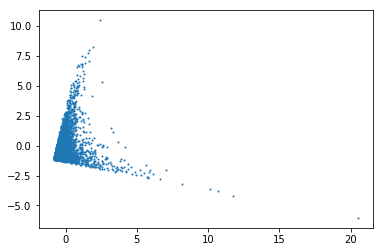

In [262]:
plt.scatter(comp[:,1],comp[:,0],s=1)

In [220]:
comp[:,1]

array([ 0.35174838,  0.31680231, -1.13472467, ..., -2.46186957,
        1.61653586,  0.52688788])

In [202]:
comp

array([[-0.29662745,  0.29272724],
       [-1.27038614,  0.22635181],
       [ 0.15327098, -0.85044784],
       ...,
       [ 1.50216774, -0.46899167],
       [ 1.99394   ,  0.59624096],
       [-0.10579355,  0.38469248]])

In [192]:
medias = []
for u in usuario_e_tempos:
    arr = np.array(u[2])/(60*60*24)
    media
    medias += [[np.mean(arr),np.std(arr),len(arr),u[0]]]

In [321]:
bla[0:60]


[['negative_emotion', 0.4106599454047266],
 ['pain', 0.368113638289622],
 ['violence', 0.35376504515794366],
 ['shame', 0.3448400276314742],
 ['positive_emotion', 0.34425324400183865],
 ['nervousness', 0.33181137666886656],
 ['suffering', 0.3213994982165373],
 ['love', 0.31631746406752764],
 ['sadness', 0.31292516133339837],
 ['contentment', 0.29978095123147525],
 ['body', 0.2962974851763304],
 ['optimism', 0.2846029002775987],
 ['hate', 0.2832765381563438],
 ['communication', 0.2799471509536197],
 ['cold', 0.2780378571740398],
 ['speaking', 0.27527470975396173],
 ['friends', 0.27506156734144643],
 ['emotional', 0.2555397767397428],
 ['trust', 0.25188425596606157],
 ['health', 0.2409883131190439],
 ['death', 0.23800945530557688],
 ['children', 0.2372801487374522],
 ['party', 0.2258462138973989],
 ['fear', 0.21436477141118254],
 ['neglect', 0.21417088885521982],
 ['family', 0.2105474678424595],
 ['home', 0.2073618875686614],
 ['giving', 0.20636807897054782],
 ['business', 0.205190659739